# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
from scipy import stats
from operator import sub
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df = df.dropna()
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded = df_encoded.reset_index()
df_encoded.drop(['index', 'id'], axis=1, inplace=True)

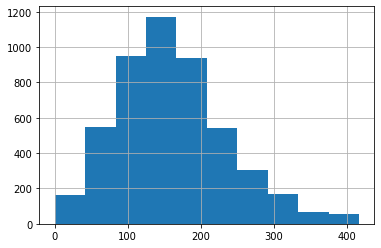

In [ ]:
# target column for regression -> bmi
df_encoded['bmi'].hist()

In [ ]:
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
1,1,101,0,1,1,2,0,2429,198,2,1
2,0,70,0,0,1,2,1,3309,217,3,1
3,0,100,1,0,1,3,0,3318,113,2,1
4,1,102,0,0,1,2,1,3367,163,1,1


In [ ]:
X = df_encoded[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status', 'stroke']]
y = df_encoded['bmi']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

lr.coef_

array([ 1.60659306e-01,  4.41021183e-01,  1.87151948e+01, -1.01319233e+01,
        2.73674699e+01, -1.15786427e+01, -6.94054982e-01,  4.95634764e-03,
        6.43021478e+00, -9.83550863e+00])

In [ ]:
lr.score(X_test, Y_test)

0.1963077156300249

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
gender,0.160659
age,0.441021
hypertension,18.715195
heart_disease,-10.131923
ever_married,27.367470
work_type,-11.578643
Residence_type,-0.694055
avg_glucose_level,0.004956
smoking_status,6.430215
stroke,-9.835509


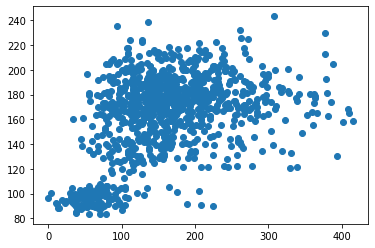

In [ ]:
y_pred = lr.predict(X_test)
plt.scatter(Y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


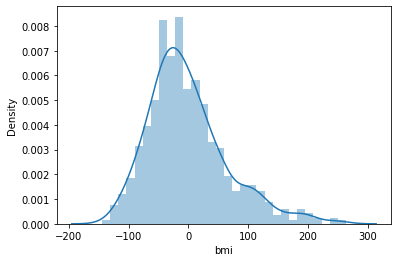

In [ ]:
sns.distplot((Y_test-y_pred),bins=30)

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 51.29429337974969
MSE: 4478.428210043753
RMSE: 66.92105954065397


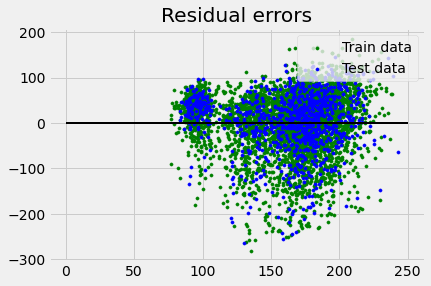

In [ ]:
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 250, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Polynomial basis functions
--

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
np.set_printoptions(formatter={'float_kind':'{:.2f}'.format})

In [ ]:
polynomial_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
polynomial_model.fit(X_train, Y_train)

y_pred = polynomial_model.predict(X_test)
polynomial_model.score(X_test, Y_test)

0.23150207003419354

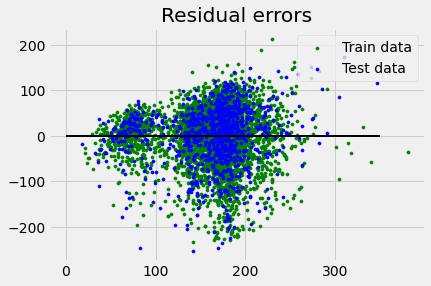

In [ ]:
plt.scatter(polynomial_model.predict(X_train), polynomial_model.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')

plt.scatter(polynomial_model.predict(X_test), polynomial_model.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 350, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

Lasso Regression (L1 Regularization)
--

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, Y_train)

y_pred = lasso_model.predict(X_test)
lasso_model.score(X_test, Y_test)

0.19630775718048976

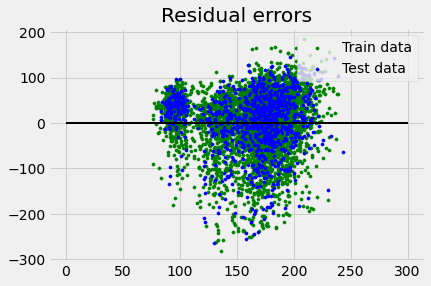

In [ ]:
plt.scatter(lasso_model.predict(X_train), lasso_model.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')

plt.scatter(lasso_model.predict(X_test), lasso_model.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 300, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [ ]:
poly_model =  make_pipeline(PolynomialFeatures(3), Lasso(alpha=1))
poly_model.fit(X_train, Y_train)

y_pred = poly_model.predict(X_test)
poly_model.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7753585.20226096, tolerance: 2221.6233138782795
  positive)


0.27327336185970197

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

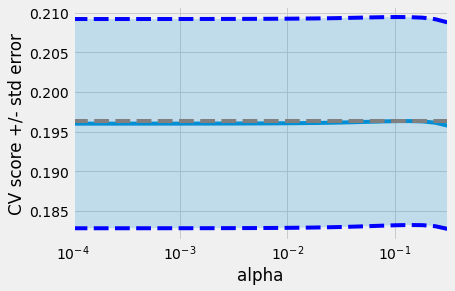

In [ ]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 20

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

Ridge Regression (L2 Regression)
--

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, Y_train)

print(ridge_model.intercept_)
y_pred = ridge_model.predict(X_test)
ridge_model.score(X_test, Y_test)

122.15935659927302


0.19630771334856492

In [ ]:
poly_model =  make_pipeline(PolynomialFeatures(2), Ridge(alpha=0.001))
poly_model.fit(X_train, Y_train)

y_pred = poly_model.predict(X_test)
poly_model.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41933e-20): result may not be accurate.
  overwrite_a=True).T


0.2820653386036216

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select an algorithm
algorithm = make_pipeline(PolynomialFeatures(), Ridge())

# Define our candidate hyperparameters
hp_candidates = [{'polynomialfeatures__degree': [2, 3, 4], 'ridge__alpha': [0.001, 0.1, 0.5, 2, 5]}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, scoring='r2')
grid.fit(X, y)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46728e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40914e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.41384e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.3904e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.4006e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgW

0.27273437295032427
Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=0.5, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
{'polynomialfeatures__degree': 2, 'ridge__alpha': 0.5}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14453e-31): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.66141e-18): result may not be accurate.
  overwrite_a=True).T
